# CNN to classify handwritten digits from the MNIST dataset (0–9 digits)

In [1]:
!python --version

Python 3.12.7


In [2]:
# Step 1: Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models

In [3]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
# 60,000 training images + 10,000 testing images

# Each image is a 28×28 grayscale digit

# Labels: digits from 0 to 9

## Load and Preprocess Data

In [5]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalise pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input (batch, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

## Build CNN Model

In [6]:
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # explicit input layer

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits (0–9)
])

## Compile the Model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the Model

In [9]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9004 - loss: 0.3277 - val_accuracy: 0.9873 - val_loss: 0.0444
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9842 - loss: 0.0493 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9926 - loss: 0.0226 - val_accuracy: 0.9882 - val_loss: 0.0458
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.9942 - loss: 0.0163 - val_accuracy: 0.9905 - val_loss: 0.0347


## Evaluate the Model

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0416
Test Accuracy: 0.9900


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


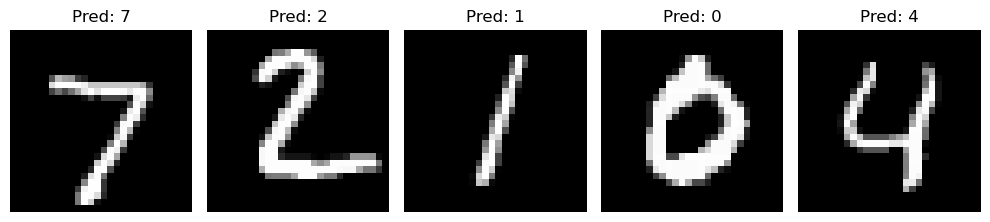

In [13]:
import numpy as np

# Predict on test images
predictions = model.predict(X_test)

# Plot first 5 images with predictions
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
# View the softmax probabilities for one sample
print("Predicted probabilities:", predictions[0])
print("Predicted label:", np.argmax(predictions[0]))
print("True label:", y_test[0])


Predicted probabilities: [1.1093288e-08 1.2889537e-08 6.1524378e-07 3.2760825e-06 7.2320759e-08
 1.4844534e-09 6.2853466e-13 9.9998975e-01 8.3909754e-07 5.4214897e-06]
Predicted label: 7
True label: 7


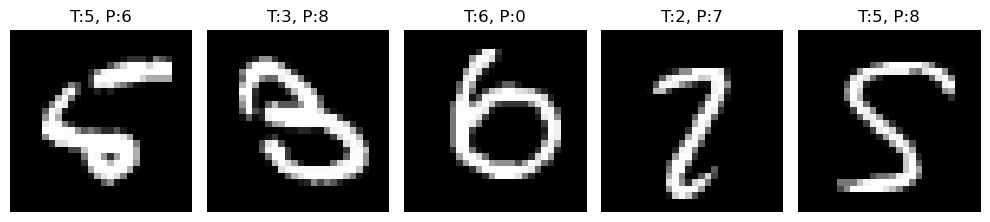

In [16]:
# Make sure this comes right after predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

# Identify incorrect predictions
wrong = np.where(y_pred != y_test)[0]

# Plot some misclassified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_test[idx]}, P:{y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Another Dataset

## Fashion MNIST Dataset

In [17]:
# 70,000 grayscale images (28×28 pixels)

# 10 classes of fashion items:

# 0: T-shirt/top      5: Sandal  
# 1: Trouser          6: Shirt  
# 2: Pullover         7: Sneaker  
# 3: Dress            8: Bag  
# 4: Coat             9: Ankle boot


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

## Load and preprocess data

In [20]:
# Load Dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalise and Reshape 
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Class names for plotting
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Build the CNN Model

In [24]:
help(tf.keras.layers)

Help on package keras._tf_keras.keras.layers in keras._tf_keras.keras:

NAME
    keras._tf_keras.keras.layers - DO NOT EDIT.

DESCRIPTION
    This file was autogenerated. Do not edit it by hand,
    since your modifications would be overwritten.

PACKAGE CONTENTS


FILE
    c:\users\danisha.ansari\appdata\local\anaconda3\lib\site-packages\keras\_tf_keras\keras\layers\__init__.py




In [27]:
model = models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compile and Train

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.7532 - loss: 0.6781 - val_accuracy: 0.8658 - val_loss: 0.3638
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8764 - loss: 0.3374 - val_accuracy: 0.8863 - val_loss: 0.3088
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8989 - loss: 0.2795 - val_accuracy: 0.8952 - val_loss: 0.2853
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9101 - loss: 0.2463 - val_accuracy: 0.8967 - val_loss: 0.2876
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.9203 - loss: 0.2231 - val_accuracy: 0.9092 - val_loss: 0.2539


## Evaluate the model

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Predict
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9015 - loss: 0.2782
Test Accuracy: 0.9027
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


## Plot sample predictions

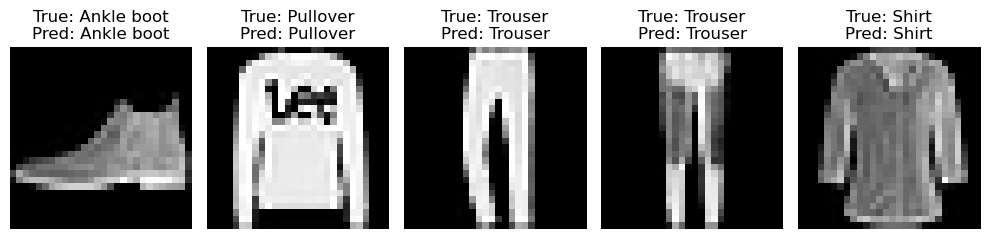

In [31]:
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Confusion Matrix for Fashion MNIST

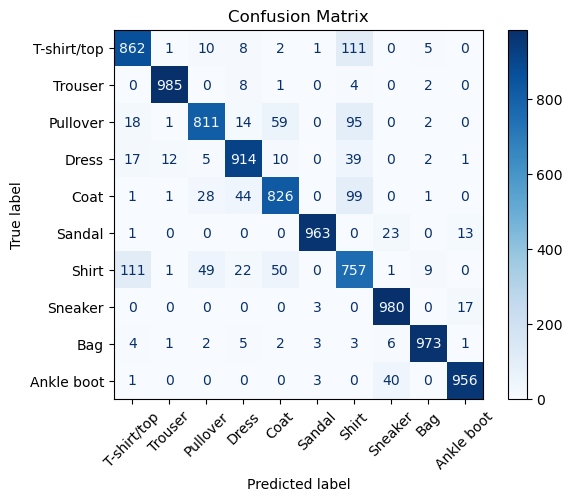

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predicted labels
y_pred = np.argmax(predictions, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


## Train vs Validation Accuracy & Loss Plot

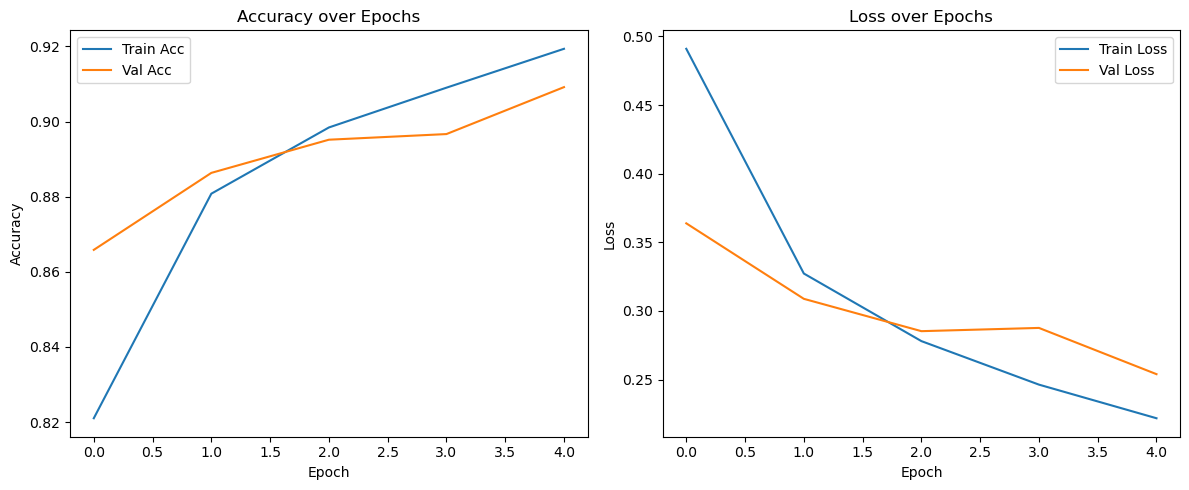

In [33]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


## Plot misclassified images

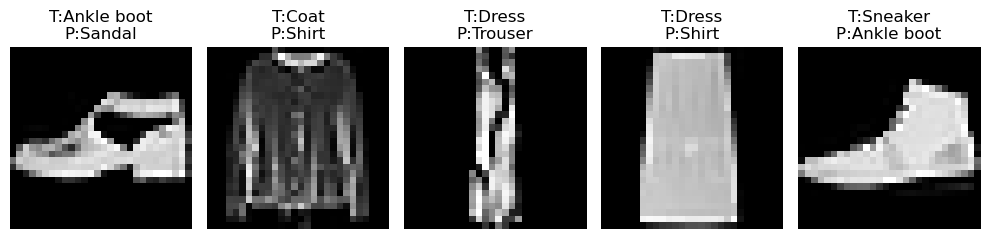

In [34]:
# Find misclassified indices
wrong_indices = np.where(y_pred != y_test)[0]

# Plot a few
plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{class_names[y_test[idx]]}\nP:{class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# ----------------------------

# Fashion MNIST Dataset with Batch Normalization, dropout layer and early stopping

## Import Required Libraries

In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

## Load and Preprocess the Data¶

In [36]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [37]:
X_train = X_train/255.0
X_test = X_test/255.0

In [39]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Set Up Data Augmentation

In [42]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)


## Build the Upgraded CNN Model

In [43]:
model = models.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


## Compile the Model

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train with Early Stopping and Augmented Data

In [49]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [50]:
from sklearn.model_selection import train_test_split

# Manually split training and validation data
X_train_aug, X_val, y_train_aug, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

# Fit only on augmented training data
history = model.fit(
    datagen.flow(X_train_aug, y_train_aug, batch_size=64),
    epochs=20,
    steps_per_epoch=len(X_train_aug) // 64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)


Epoch 1/20


C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


843/843 ━━━━━━━━━━━━━━━━━━━━ 65s 72ms/step - accuracy: 0.6909 - loss: 0.8736 - val_accuracy: 0.8090 - val_loss: 0.4761
Epoch 2/20
  1/843 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8438 - loss: 0.3446

C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8438 - loss: 0.3446 - val_accuracy: 0.8153 - val_loss: 0.4622
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 62s 73ms/step - accuracy: 0.8055 - loss: 0.5215 - val_accuracy: 0.8520 - val_loss: 0.3926
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7500 - loss: 0.5551 - val_accuracy: 0.8460 - val_loss: 0.4095
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - accuracy: 0.8242 - loss: 0.4734 - val_accuracy: 0.8795 - val_loss: 0.3266
Epoch 6/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.4391 - val_accuracy: 0.8800 - val_loss: 0.3268
Epoch 7/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 60s 71ms/step - accuracy: 0.8354 - loss: 0.4372 - val_accuracy: 0.8793 - val_loss: 0.3293
Epoch 8/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8281 - loss: 0.4742 - val_accuracy: 0.8757 - val_loss: 0.3344
Epoch 9/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.8474 - loss: 0.4110 - val_accuracy: 0.847

## Evaluate the model

In [52]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8802 - loss: 0.3254
Test Accuracy: 0.8824


## Prediction and Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


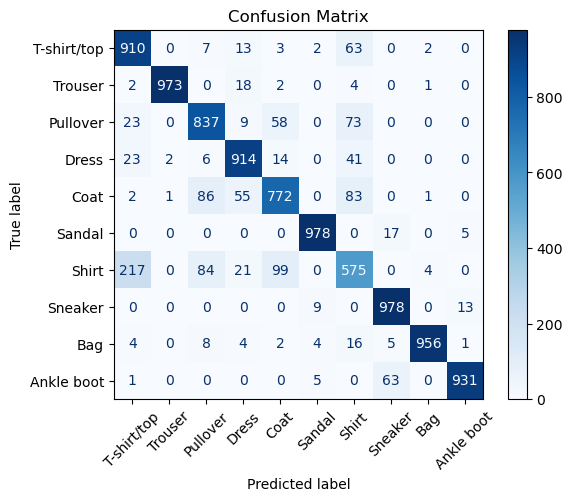

In [54]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names).plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()


## Accuracy and Loss Plot

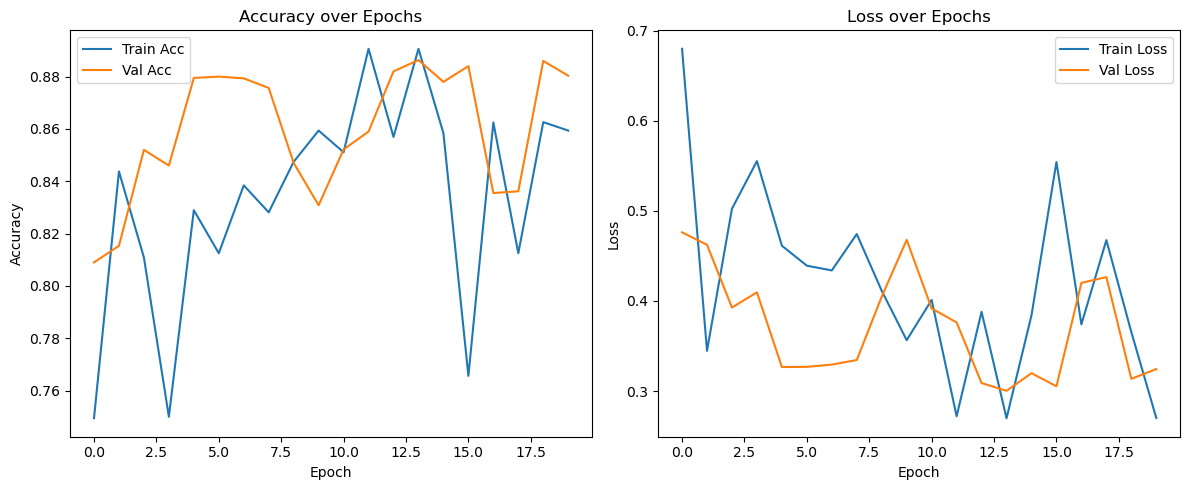

In [55]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


## Misclassified Images

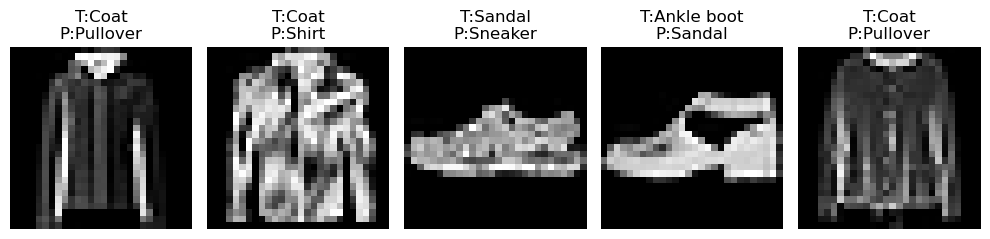

In [57]:
wrong_idx = np.where(y_pred != y_test)[0]

plt.figure(figsize=(10, 5))
for i, idx in enumerate(wrong_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{class_names[y_test[idx]]}\nP:{class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Correcly classified Images

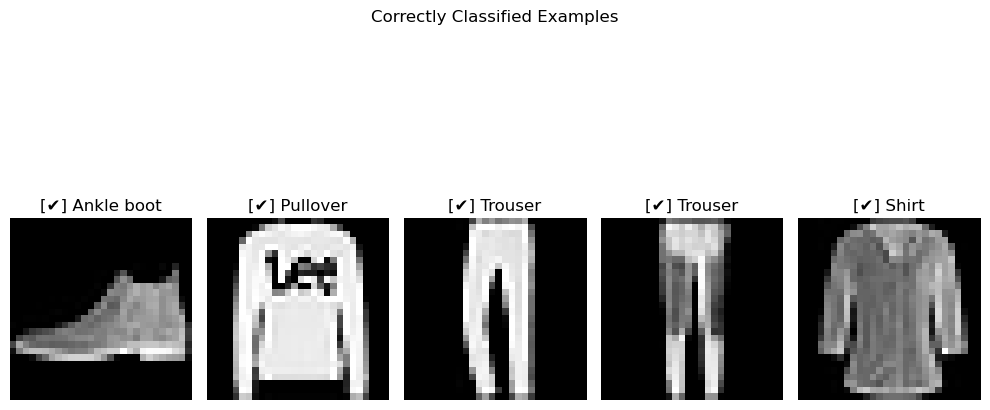

In [59]:
y_pred = np.argmax(predictions, axis=1)
# Find correctly classified indices
correct_idx = np.where(y_pred == y_test)[0]

# Plot a few correctly predicted images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"[✔] {class_names[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Correctly Classified Examples", y=1.1)
plt.show()


In [60]:
import numpy as np

batch = np.array([8.0, 10.0, 12.0, 14.0])

# Step 1: Mean and std
mean = np.mean(batch)
std = np.std(batch)

# Step 2: Normalize
normalized = (batch - mean) / std

# Step 3: Learnable gamma and beta
gamma = 1.5
beta = 0.5

# Step 4: Final output
output = gamma * normalized + beta

print("Original:", batch)
print("Normalized:", normalized)
print("Final output:", output)


Original: [ 8. 10. 12. 14.]
Normalized: [-1.34164079 -0.4472136   0.4472136   1.34164079]
Final output: [-1.51246118 -0.17082039  1.17082039  2.51246118]


# Cifar Dataset

# Load and Explore CIFAR-10

In [61]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print shapes
print("x_train shape:", x_train.shape)   # (50000, 32, 32, 3)
print("y_train shape:", y_train.shape)   # (50000, 1)
print("x_test shape:", x_test.shape)     # (10000, 32, 32, 3)

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)


## Visualize sample images

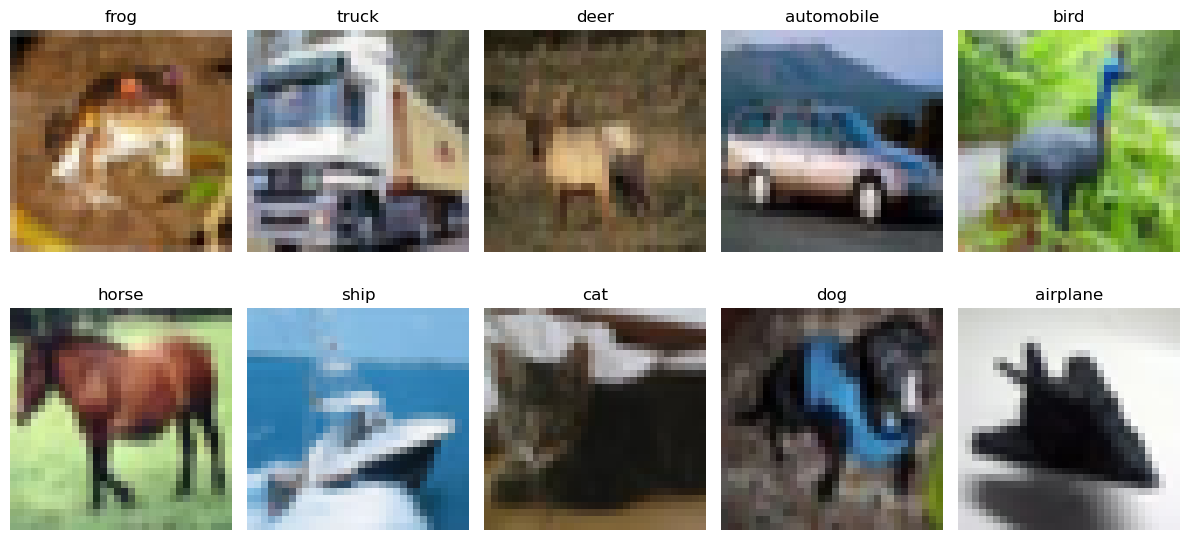

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data again (if not already)
(x_train, y_train), (_, _) = cifar10.load_data()

# Class label names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 1 image per class
plt.figure(figsize=(12, 6))
shown_classes = set()
i = 0
while len(shown_classes) < 10:
    label = y_train[i][0]
    if label not in shown_classes:
        plt.subplot(2, 5, len(shown_classes) + 1)
        plt.imshow(x_train[i])
        plt.title(class_names[label])
        plt.axis('off')
        shown_classes.add(label)
    i += 1

plt.tight_layout()
plt.show()


## Normalize and Prepare

In [63]:
from sklearn.model_selection import train_test_split

# Normalize pixel values from [0, 255] to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Split training set: 10% for validation
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

# Check shapes
print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)
print("Test set:", x_test.shape)


Training set: (45000, 32, 32, 3)
Validation set: (5000, 32, 32, 3)
Test set: (10000, 32, 32, 3)


In [64]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),  
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,098 (629.29 KB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

## Compile the Model

In [65]:
model.compile(
    optimizer='adam',                
    loss='sparse_categorical_crossentropy',  # Use this for integer labels (0–9)
    metrics=['accuracy']                
)

## Train the model

In [67]:
history = model.fit(
    x_train, y_train,
    epochs=10,                  # Number of times the model sees the full dataset
    validation_split=0.1,      # 10% data will be used for validation
    batch_size=64,             # Number of samples per gradient update
    verbose=1                  # Show training progress
)

Epoch 1/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 42s 60ms/step - accuracy: 0.3539 - loss: 1.8978 - val_accuracy: 0.5320 - val_loss: 1.2943
Epoch 2/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.5520 - loss: 1.2539 - val_accuracy: 0.5238 - val_loss: 1.3814
Epoch 3/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.6217 - loss: 1.0685 - val_accuracy: 0.6116 - val_loss: 1.0766
Epoch 4/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.6669 - loss: 0.9482 - val_accuracy: 0.5971 - val_loss: 1.2253
Epoch 5/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 35s 55ms/step - accuracy: 0.6918 - loss: 0.8848 - val_accuracy: 0.5589 - val_loss: 1.3802
Epoch 6/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 32s 50ms/step - accuracy: 0.7105 - loss: 0.8103 - val_accuracy: 0.6040 - val_loss: 1.1861
Epoch 7/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 30s 48ms/step - accuracy: 0.7394 - loss: 0.7471 - val_accuracy: 0.6758 - val_loss: 0.9465
Epoch 8/10
633/633 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.7522 - loss: 0.7008 - 

## Plot Training & Validation Accuracy and Loss

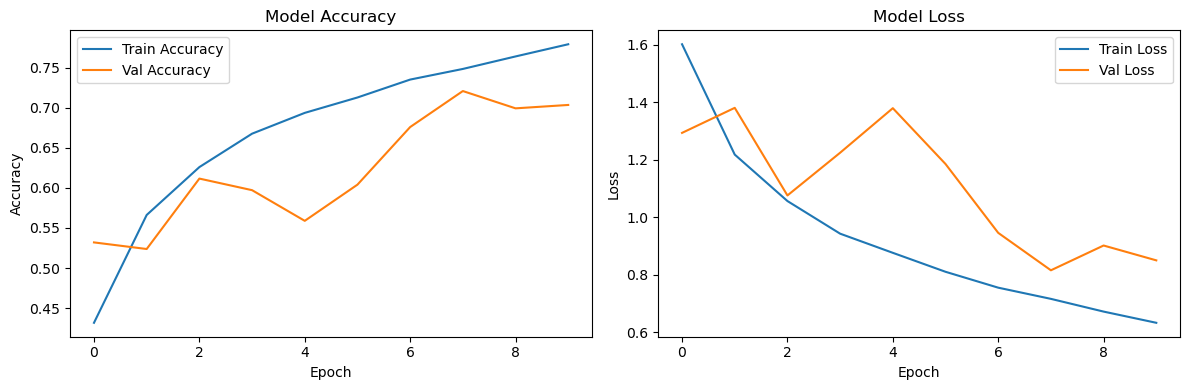

In [68]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


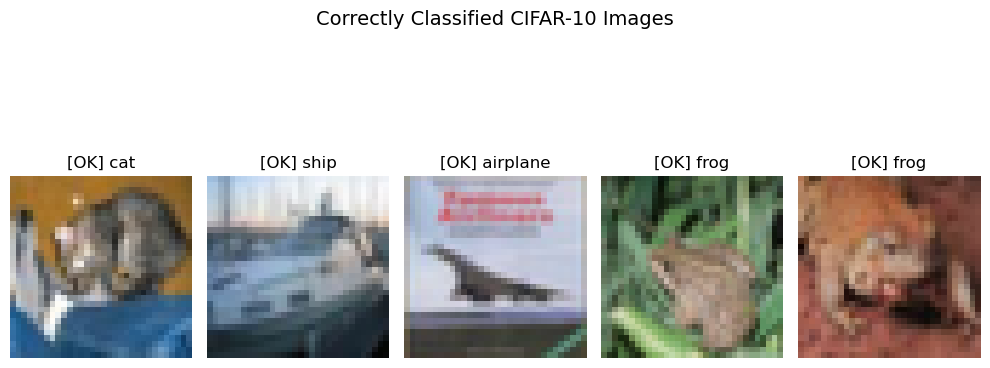

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels
y_pred = np.argmax(model.predict(x_test), axis=1)

# Find correctly classified indices
correct_idx = np.where(y_pred == y_test.flatten())[0]

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 5 correctly classified images
plt.figure(figsize=(10, 5))
for i, idx in enumerate(correct_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f"[OK] {class_names[y_pred[idx]]}")
    plt.axis('off')

plt.suptitle("Correctly Classified CIFAR-10 Images", fontsize=14)
plt.tight_layout()
plt.show()


## Misclassified Image

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


C:\Users\danisha.ansari\AppData\Local\Temp\ipykernel_4328\1049575037.py:21: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\danisha.ansari\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


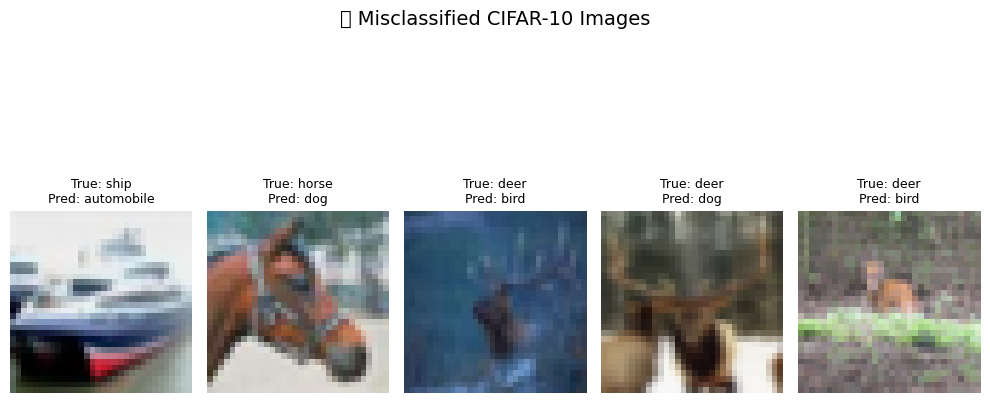

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Get predicted class indices from the softmax output
y_pred = np.argmax(model.predict(x_test), axis=1)

# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test.flatten())[0]

# Plot a few misclassified examples
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified_idx[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx])
    true_label = class_names[y_test[idx][0]] if y_test.ndim > 1 else class_names[y_test[idx]]
    pred_label = class_names[y_pred[idx]]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=9)
    plt.axis('off')

plt.suptitle("❌ Misclassified CIFAR-10 Images", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
🔍 Classification Report:

              precision    recall  f1-score   support

    airplane       0.67      0.81      0.74      1000
  automobile       0.83      0.89      0.86      1000
        bird       0.53      0.72      0.61      1000
         cat       0.51      0.49      0.50      1000
        deer       0.77      0.56      0.65      1000
         dog       0.53      0.77      0.63      1000
        frog       0.89      0.70      0.78      1000
       horse       0.83      0.72      0.77      1000
        ship       0.92      0.65      0.76      1000
       truck       0.87      0.76      0.81      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.71     10000
weighted avg       0.74      0.71      0.71     10000



<Figure size 1000x800 with 0 Axes>

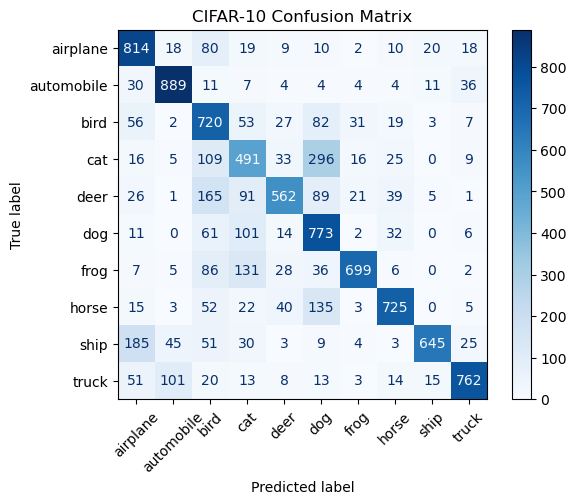

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()  # Ensure it's a flat array

# 1. Classification Report
print("🔍 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("CIFAR-10 Confusion Matrix")
plt.show()
